In [73]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings("ignore")

In [74]:
# Reading the file
surprise_housing_df = pd.read_csv("train.csv")
surprise_housing_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
# Checking the basic information
surprise_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [76]:
# Функция активации ReLU
def relu(x):
    return np.maximum(0, x)

In [77]:
# Пример расчета веса
def update_weights(weights, learning_rate, gradient):
    return weights - learning_rate * gradient

In [78]:
# Function to return columns with null values
def columns_with_missing_values():
    total = surprise_housing_df.isnull().sum().sort_values(ascending=False)
    percent = round(surprise_housing_df.isnull().sum()*100/len(surprise_housing_df), 2).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

columns_with_missing_values()

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
...,...,...
ExterQual,0,0.00
Exterior2nd,0,0.00
Exterior1st,0,0.00
RoofMatl,0,0.00


In [79]:
# Подготовка данных
data = surprise_housing_df.copy()

In [80]:
# Обработка пропущенных значений для числовых столбцов
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [81]:
# Преобразование категориальных данных в числовые с помощью one-hot кодирования
data = pd.get_dummies(data)

In [82]:
# Разделение данных на признаки и метки
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [83]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
# Экспериментальный подбор параметров обучения
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

mlp = MLPRegressor(max_iter=10)
grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(X_scaled, y)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'solver': 'sgd'}


In [85]:
# Оценка качества обучения и проверка адекватности обучения
y_pred = best_model.predict(X_scaled)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1877462936.31837
R2 Score: 0.7023107860822027


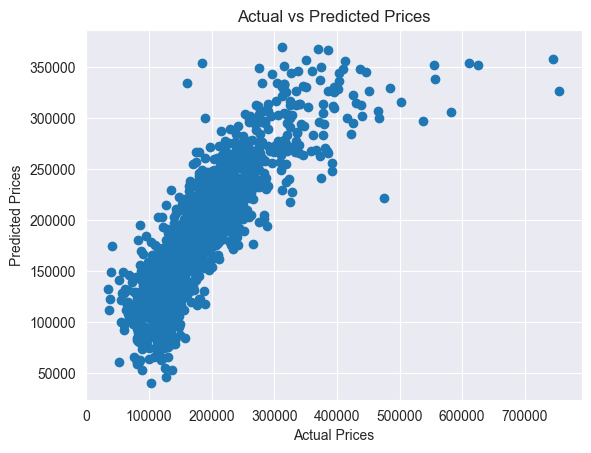

In [86]:
plt.scatter(y, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()